In [26]:
# plotting libraries
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

# data analysis libraries
import pandas as pd
import numpy as np

# general imports
from pathlib import Path

# auxiliary functions
import s3ts.analysis as aux

In [27]:
# plt.rc('font', family='serif')
# plt.rc('xtick', labelsize='medium')
# plt.rc('ytick', labelsize='medium')

In [28]:
df = aux.load_data(Path("../results_synced/stride/"))
#df["target_best_model"].str.split("/").str[5].str[6:].str.split("-").str[0]
df

,dataset,arch,pretrained,fold_number,random_state,batch_size,window_length,window_stride,target_val_acc,target_val_f1,...,target_test_auroc,target_best_model,target_train_csv,nsamp_tra,nsamp_pre,nsamp_test,pretrain_val_mse,pretrain_val_r2,pretrain_best_model,pretrain_train_csv
0,Plane,CNN_DFS,False,3,0,128,5,1,0.379395,0.379395,...,0.800548,training/EXP_stride_f3.0_base_2023-03-16_16-13...,training/EXP_stride_f3.0_base_2023-03-16_16-13...,6177,0,6033,NaN,NaN,NaN,NaN
1,GunPoint,ResNet_DFS,False,3,0,128,5,1,0.699219,0.699219,...,0.719047,training/EXP_stride_f3.0_base_2023-03-16_13-39...,training/EXP_stride_f3.0_base_2023-03-16_13-39...,6135,0,5985,NaN,NaN,NaN,NaN
2,GunPoint,ResNet_DFS,True,3,0,128,5,1,0.720215,0.720215,...,0.786675,training/EXP_stride_f3.0_2023-03-16_14-13/logs...,training/EXP_stride_f3.0_2023-03-16_14-13/logs...,6135,18135,5985,0.122514,0.984830,training/EXP_stride_f3.0_2023-03-16_14-13/logs...,training/EXP_stride_f3.0_2023-03-16_14-13/logs...
3,GunPoint,ResNet_DFS,False,3,0,128,5,2,0.697266,0.697266,...,0.789281,training/EXP_stride_f3.1_base_2023-03-16_15-35...,training/EXP_stride_f3.1_base_2023-03-16_15-35...,6120,0,5970,NaN,NaN,NaN,NaN
4,GunPoint,ResNet_DFS,False,0,0,128,5,1,0.665039,0.665039,...,0.745775,training/EXP_stride_f0.0_base_2023-03-16_13-39...,training/EXP_stride_f0.0_base_2023-03-16_13-39...,6135,0,5985,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,Coffee,CNN_DFS,True,0,0,128,5,5,0.629340,0.629340,...,0.619707,training/EXP_stride_f0.4_2023-03-16_15-30/logs...,training/EXP_stride_f0.4_2023-03-16_15-30/logs...,3357,9649,3357,0.158442,0.974423,training/EXP_stride_f0.4_2023-03-16_15-30/logs...,training/EXP_stride_f0.4_2023-03-16_15-30/logs...
150,Plane,ResNet_DFS,False,0,0,128,5,1,0.583496,0.583496,...,0.900787,training/EXP_stride_f0.0_base_2023-03-16_13-39...,training/EXP_stride_f0.0_base_2023-03-16_13-39...,6177,0,6033,NaN,NaN,NaN,NaN
151,Plane,ResNet_DFS,True,0,0,128,5,1,0.615234,0.615234,...,0.913870,training/EXP_stride_f0.0_2023-03-16_14-12/logs...,training/EXP_stride_f0.0_2023-03-16_14-12/logs...,6177,18273,6033,0.058059,0.996584,training/EXP_stride_f0.0_2023-03-16_14-12/logs...,training/EXP_stride_f0.0_2023-03-16_14-12/logs...
152,Plane,ResNet_DFS,False,0,0,128,5,2,0.576172,0.576172,...,0.894907,training/EXP_stride_f0.1_base_2023-03-16_15-31...,training/EXP_stride_f0.1_base_2023-03-16_15-31...,6162,0,6018,NaN,NaN,NaN,NaN


In [29]:
dfp = df.groupby(["dataset", "arch", "window_stride", "pretrained"])[["target_val_acc", "target_test_acc"]].mean().reset_index()
dfp

,dataset,arch,window_stride,pretrained,target_val_acc,target_test_acc
0,Coffee,CNN_DFS,1,False,0.527500,0.484901
1,Coffee,CNN_DFS,1,True,0.658906,0.564488
2,Coffee,CNN_DFS,2,False,0.536719,0.493414
3,Coffee,CNN_DFS,2,True,0.633594,0.585117
4,Coffee,CNN_DFS,3,False,0.569271,0.551616
5,Coffee,CNN_DFS,3,True,0.668750,0.635901
6,Coffee,CNN_DFS,4,False,0.564525,0.517653
7,Coffee,CNN_DFS,4,True,0.644965,0.618974
8,Coffee,CNN_DFS,5,False,0.543692,0.495650
9,Coffee,CNN_DFS,5,True,0.665220,0.620406


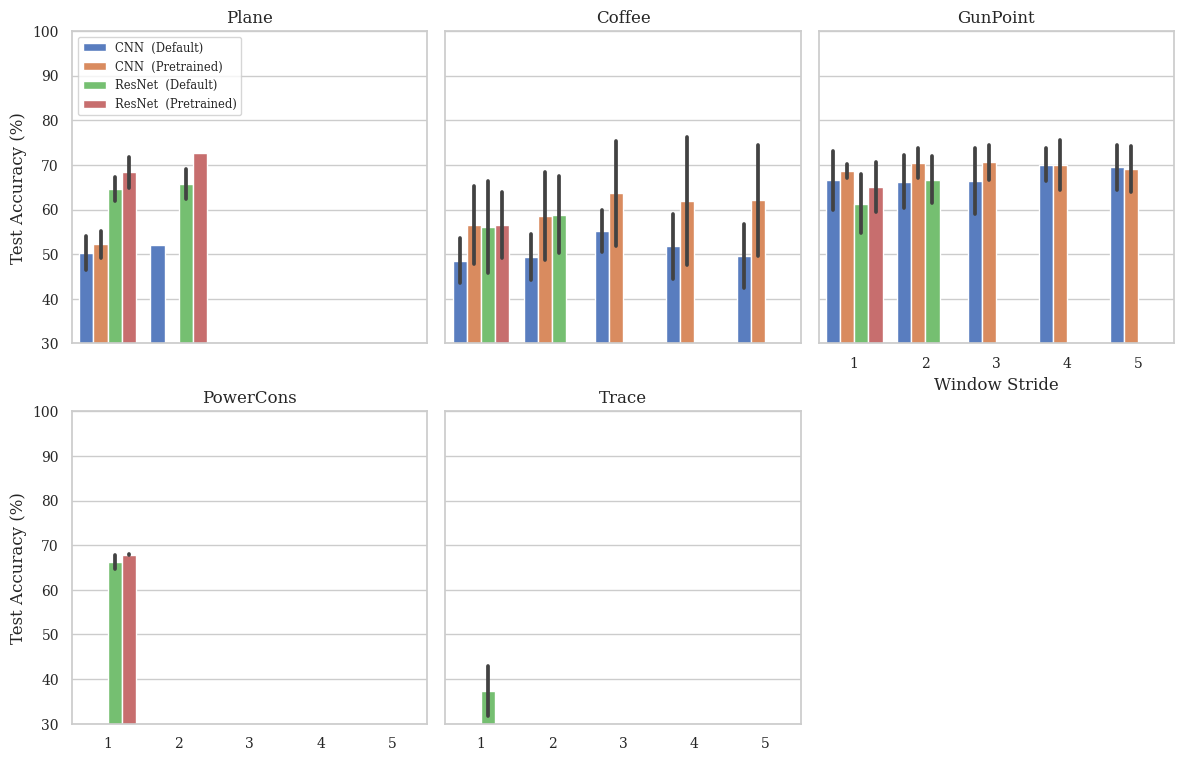

In [33]:
data = df.copy()
data["target_test_acc"] = 100*data["target_test_acc"]
data["xd"] = data["pretrained"].replace({True: "(Pretrained)", False: "(Default)"})
data["arch"] = data["arch"].str.replace("_DFS", " ")
data["hue"] = data["arch"] + " " + data["xd"]
data.sort_values("hue", inplace=True)

sns.set_theme()
sns.set_style("whitegrid")
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='small')
plt.rc('ytick', labelsize='small')
g = sns.catplot(data=data, x="window_stride", y="target_test_acc", hue="hue", col="dataset", #row="arch",# hue="pretrained",
                kind="bar",  height=4, aspect=1, margin_titles=True, legend=False, legend_out=False, palette="muted", #["blue", "green", "orange", "red"],
                errorbar="sd", col_wrap=3, facet_kws={"despine": False, "ylim": (30, 100), 
                    "gridspec_kws": {}});

#g.despine()
g.set_titles(row_template="{row_name}", col_template="{col_name}")
g.set_ylabels("Test Accuracy (%)")
g.set_xlabels("Window Stride")
g.add_legend(adjust_subtitles=True, fontsize="x-small")
g.facet_axis(0,0).set_xlabel("")
g.facet_axis(0,1).set_xlabel("")
g.facet_axis(0,3).set_xlabel("")
g.facet_axis(0,4).set_xlabel("");